<a href="https://colab.research.google.com/github/NiEl0503/simulador4/blob/main/Simulador4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Simulator Télos - Nível 4 Trilha de Dados**


**Contextualização**

Aprendemos que a análise de dados oferece insights valiosos para a
tomada de decisões, e que coletar e tratar os dados corretamente é
fundamental para que possamos elaborar os KPIs.


### Desafio 1 - Raspagem de dados IMDB


#### **Perguntas de negócio e KPIs:**

**1. Qual é a distribuição de Lançamentos por Ano?**

**KPI:** Ano por número de filmes

**2. Qual é a duração dos Filmes e Notas?**

**KPI:** Nota por duração

**3. Como a classificação indicativa se relaciona com a avaliação do filme?**

**KPI:** Nota por faixa etária

In [1]:
# Raspagem da URL https://www.imdb.com/chart/top/
# Robots.txt
import requests

url = 'https://www.imdb.com/robots.txt'

try:
  answer = requests.get(url)
  answer.raise_for_status()

  robots = answer.text
  print(robots)

except requests.exceptions.RequestException as e:
  print(f"Erro de acesso {url}: {e}")

# robots.txt for https://www.imdb.com properties
User-agent: *
Disallow: /OnThisDay
Disallow: /ads/
Disallow: /ap/
Disallow: /mymovies/
Disallow: /r/
Disallow: /register
Disallow: /registration/
Disallow: /search/name-text
Disallow: /search/title-text
Disallow: /find
Disallow: /find$
Disallow: /find/
Disallow: /tvschedule
Disallow: /updates
Disallow: /watch/_ajax/option
Disallow: /_json/video/mon
Disallow: /_json/getAdsForMediaViewer/
Disallow: /list/ls*/_ajax
Disallow: /list/ls*/export
Disallow: /*/*/rg*/mediaviewer/rm*/tr
Disallow: /*/rg*/mediaviewer/rm*/tr
Disallow: /*/mediaviewer/*/tr
Disallow: /title/tt*/mediaviewer/rm*/tr
Disallow: /name/nm*/mediaviewer/rm*/tr
Disallow: /gallery/rg*/mediaviewer/rm*/tr
Disallow: /tr/
Disallow: /title/tt*/watchoptions
Disallow: /search/title/?title_type=feature,tv_movie,tv_miniseries,documentary,short,video,tv_short&release_date=,2020-12-31&lists=%21ls538187658,%21ls539867036,%21ls538186228&view=simple&sort=num_votes,asc&aft
Disallow: /name/nm*/fil

In [2]:
# Raspado de dados
from requests.exceptions import HTTPError

contenido = None
URL = 'https://www.imdb.com/chart/top/'

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebkit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

try:
  response = requests.get(URL, headers=headers)
  response.raise_for_status()
  contents = response.content

except HTTPError as http_err:
  print(f"Ocurrio u error HTTP: {http_err}")
except Exception as err:
  print(f"Ocurrio un error: {err}")

if contents is not None:
  print("Conteúdo da página baixado com sucesso")
else:
  print("Erro ao baixar o conteúdo da página")

Conteúdo da página baixado com sucesso


In [3]:
# BeautifulSoup
from bs4 import BeautifulSoup

content_html = contents

page = BeautifulSoup(content_html, 'html.parser')

print("HTML carregado com sucesso usando BeautifulSoup")

HTML carregado com sucesso usando BeautifulSoup


In [4]:
import pandas as pd

list_movies = []

titles = page.find_all('a', class_='ipc-title-link-wrapper')

for title in titles:
    name_filme = title.get_text(strip=True)

    father = title.find_parent('div', class_='ipc-metadata-list-summary-item__c')

    info_details = father.find_all('span', class_='cli-title-metadata-item')

    if info_details and len(info_details) >= 3:
        year = info_details[0].get_text(strip=True)
        duration = info_details[1].get_text(strip=True)
        classification = info_details[2].get_text(strip=True)
    else:
        year = None
        duration = None
        classification = None

    rating_details = father.find_all('span', class_='ipc-rating-star--rating')
    ratings = [rating_span.get_text(strip=True) for rating_span in rating_details]

    movie_info = {
        'Title': name_filme,
        'Year': year,
        'Duration': duration,
        'Clasification': classification,
        'Note': ', '.join(ratings) if ratings else None
    }

    list_movies.append(movie_info)


In [5]:
df_movies = pd.DataFrame(list_movies)

if not df_movies.empty:
    print("Dataframe criado com sucesso")
else:
    print("Falha ao criar dataframe")

Dataframe criado com sucesso


In [6]:
df_movies.head(25)

,Title,Year,Duration,Clasification,Note
0,1. The Shawshank Redemption,1994,2h 22m,R,9.3
1,2. The Godfather,1972,2h 55m,R,9.2
2,3. The Dark Knight,2008,2h 32m,PG-13,9.0
3,4. The Godfather Part II,1974,3h 22m,R,9.0
4,5. 12 Angry Men,1957,1h 36m,Approved,9.0
5,6. The Lord of the Rings: The Return of the King,2003,3h 21m,PG-13,9.0
6,7. Schindler's List,1993,3h 15m,R,9.0
7,8. Pulp Fiction,1994,2h 34m,R,8.9
8,9. The Lord of the Rings: The Fellowship of th...,2001,2h 58m,PG-13,8.9
9,"10. The Good, the Bad and the Ugly",1966,2h 58m,R,8.8


In [ ]:
# baixar o arquivo como csv
df_movies.to_csv('data.csv')

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

### **1. Distribuição de Lançamentos por Ano:**

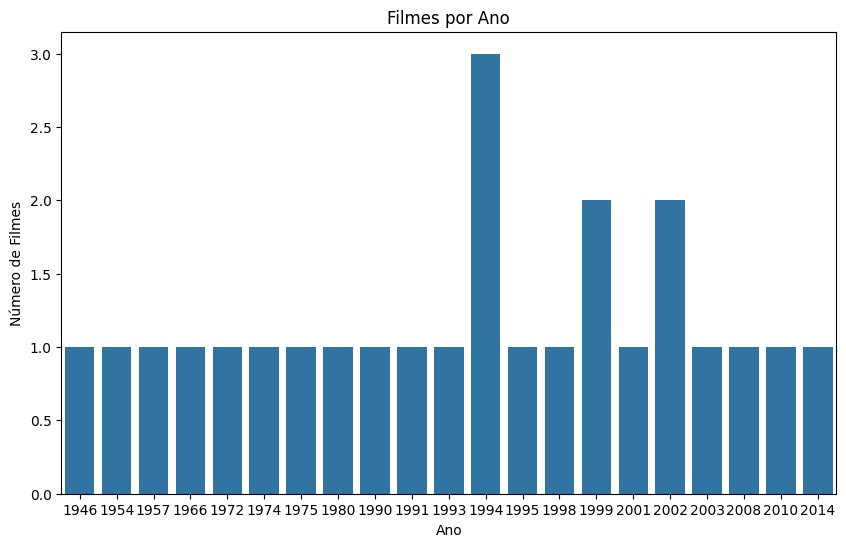

In [ ]:
filmes_por_ano = df_movies.groupby('Year')['Title'].count().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='Year', y='Title', data=filmes_por_ano)
plt.title('Filmes por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Filmes')
plt.show()

- A análise da distribuição de filmes por ano revela uma tendência de que a maioria dos anos apresenta apenas um único lançamento. Isso sugere que muitos anos não têm um volume significativo de lançamentos, o que pode estar relacionado a estratégias de distribuição ou à capacidade de produção das empresas de cinema.

- No entanto, os anos de 1999 e 2002 são exceções, com dois lançamentos cada. Isso pode indicar um aumento no interesse do público ou uma estratégia de marketing mais agressiva por parte das produtoras nesses anos.

- O ano de 1994 se destaca com o maior número de lançamentos, totalizando três filmes. Isso pode ser um indicador de um ano particularmente produtivo ou de um período de grande criatividade na indústria cinematográfica.

### **2. Duração dos Filmes e Notas:**

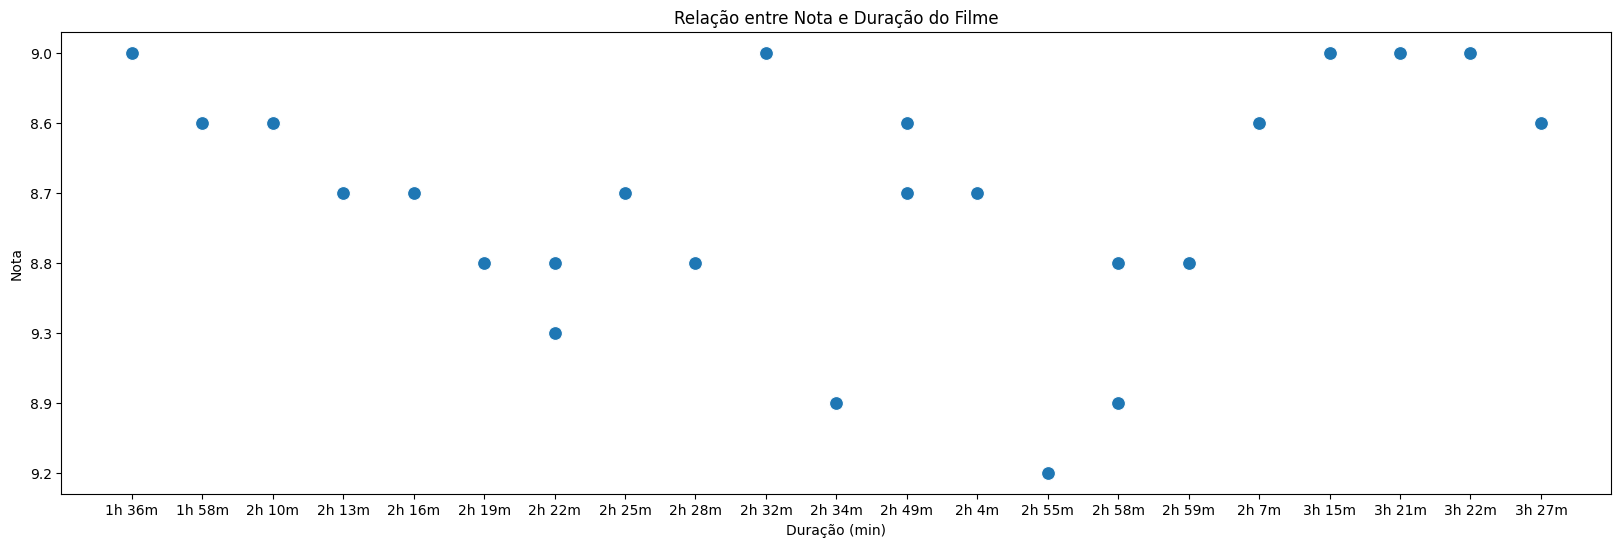

In [ ]:
df_movies_sorted = df_movies.sort_values('Duration')

plt.figure(figsize=(20,6))
sns.scatterplot(x='Duration', y='Note', data=df_movies_sorted, s=100)
plt.title('Relação entre Nota e Duração do Filme')
plt.xlabel('Duração (min)')
plt.ylabel('Nota')
plt.show()



- A análise da relação entre a duração dos filmes e suas notas não mostra uma correlação clara. Isso indica que a duração de um filme não é um fator determinante para sua recepção crítica ou popularidade.

- Tanto filmes curtos quanto longos podem ter avaliações variadas, sugerindo que aspectos como roteiro, atuação, direção e produção desempenham papéis mais significativos na avaliação do filme do que a sua duração.

### **3. Classificação Indicativa e Notas:**

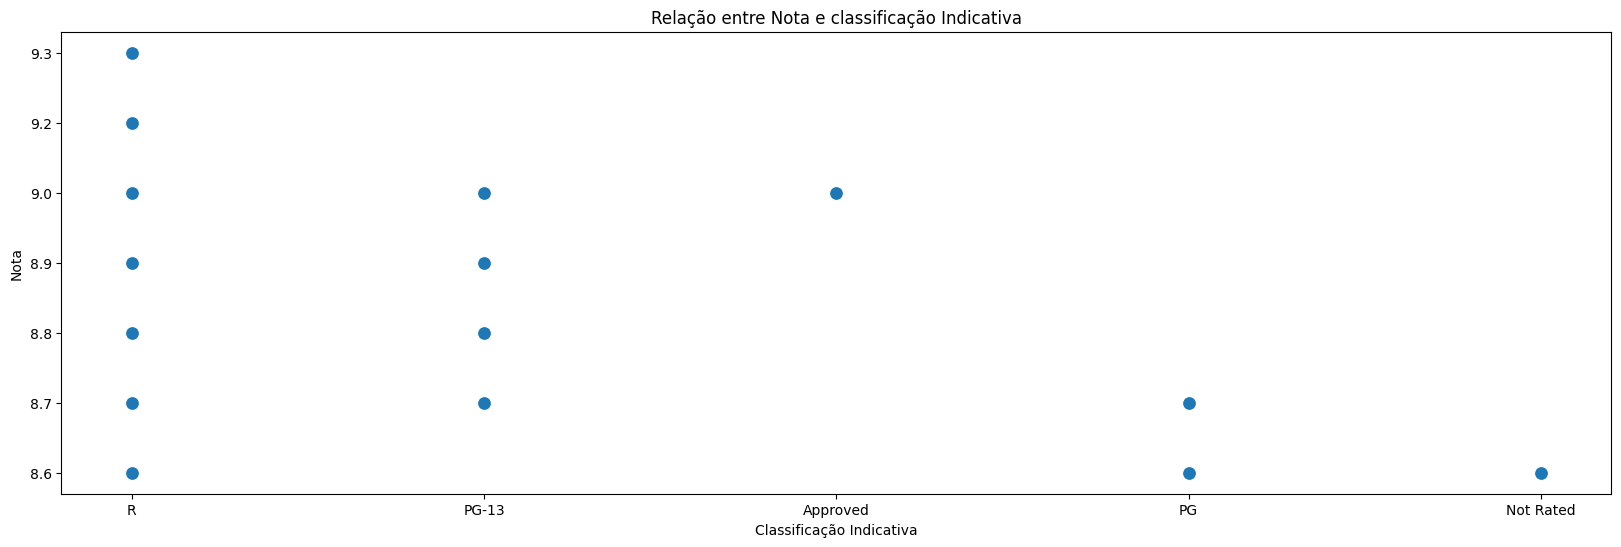

In [8]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='Clasification', y='Note', data=df_movies, s=100)
plt.title('Relação entre Nota e classificação Indicativa')
plt.xlabel('Classificação Indicativa')
plt.ylabel('Nota')
plt.show()


**R (Restrito):** Restrito, para maiores de 17 anos.

**PG-13:** Orientação parental sugerida, não recomendada para menores de 13 anos.

**Approved:** Aprovado, sem restrições (geralmente se aplica a filmes mais antigos).

**PG (Orientação Parental):** Orientação parental recomendada, mas adequada para crianças.

**Not Rated (Não avaliado):** Sem classificação.

- A análise das classificações etárias revela que filmes com classificação R e PG-13 abrangem uma ampla gama de notas. Isso sugere que a qualidade do filme não é exclusivamente dependente da sua classificação etária.

- Filmes com classificação R, que muitas vezes lidam com temas mais pesados ou complexos, podem obter avaliações altas, assim como os filmes PG-13, que são voltados para um público mais jovem.

- Os filmes que não possuem avaliação ou são apenas aprovados tendem a ter notas mais baixas em comparação com as outras classificações. Isso pode indicar uma falta de atenção ou crítica especializada para esses filmes, resultando em notas inferiores.

- Os dados sobre filmes com classificação PG são limitados, dificultando uma análise conclusiva. No entanto, os poucos filmes nesta categoria têm notas moderadas, sugerindo que, embora possam ser bem recebidos, não estão tão presentes quanto os filmes R e PG-13.

## **Insights e Recomendações**

**Foco em Anos Produtivos:** produtores e distribuidores devem analisar os fatores que levaram ao sucesso em anos com múltiplos lançamentos, como 1999 e 2002. A compreensão do contexto de mercado e das estratégias de marketing pode ajudar a replicar esse sucesso em anos futuros.


**Diversidade de Duração:** como a duração dos filmes não impacta significativamente suas notas, cineastas devem se sentir livres para explorar diferentes formatos, sem a preocupação de que longas ou curtas durações sejam um impeditivo para a qualidade.


**Estratégia de Classificação:** as distribuidoras podem considerar uma maior ênfase em filmes com classificações R e PG-13, uma vez que eles mostram potencial para avaliações mais altas. Isso pode incluir investimentos em produções que abordem temas mais complexos ou adultos, atraindo audiências que buscam experiências cinematográficas mais profundas.

**Valorização de Filmes Menos Avaliados:** filmes que não receberam avaliações robustas merecem mais atenção por parte dos críticos e da indústria. Uma estratégia para melhorar suas classificações pode incluir a promoção desses filmes e a busca por críticas que ajudem a elevar suas notas.

**Necessidade de Dados Mais Completos:** a análise dos filmes PG indica uma lacuna nos dados. É fundamental coletar informações mais completas sobre este tipo de filme para entender seu desempenho e para que se possa fazer uma análise mais ampla do mercado.

### Desafio 2 - KPIs com a base da NBA

**Contextualização**

Você é o Analista de dados do presidente do time ‘Sacramento Kings’
Com a base de dados dos jogadores da NBA, crie KPIs que possam ser
relevantes

In [9]:
import pandas as pd

df_nba = pd.read_csv('/content/Simulador_Nivel_4_nba2k20_full_632902088d.csv')

In [ ]:
df_nba

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,Brandon Goodwin,68,#0,Atlanta Hawks,G,10/02/95,6-0 / 1.83,180 lbs. / 81.6 kg.,$522738,USA,2018,Undrafted,Undrafted,Florida Gulf Coast
425,Michael Frazier,68,#21,Houston Rockets,G,03/08/94,6-3 / 1.91,200 lbs. / 90.7 kg.,$79568,USA,2015,2,60,Florida
426,Kostas Antetokounmpo,68,#37,Los Angeles Lakers,F,11/20/97,6-10 / 2.08,200 lbs. / 90.7 kg.,$79568,Greece,2018,Undrafted,Undrafted,Dayton
427,Jalen Lecque,68,#0,Phoenix Suns,G,06/13/00,6-3 / 1.91,190 lbs. / 86.2 kg.,$898310,USA,2019,Undrafted,Undrafted,NaN


In [10]:
# Transformando as colunas de peso e altura

def extract_after_slash(value):
    if '/' in value:
        return value.split('/')[1].strip()
    return value.strip()

def clean_and_convert(value):
    value = value.replace('m', '').replace('cm', '').replace('kg.', '').replace('lbs.', '').strip()
    try:
        return float(value)
    except ValueError:
        return None

df_nba['height'] = df_nba['height'].apply(extract_after_slash)
df_nba['weight'] = df_nba['weight'].apply(extract_after_slash)

df_nba['height'] = df_nba['height'].apply(clean_and_convert)
df_nba['weight'] = df_nba['weight'].apply(clean_and_convert)

df_nba


,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,2.06,113.4,$37436858,USA,2003,1,1,NaN
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,2.01,102.1,$32742000,USA,2011,1,15,San Diego State
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,2.11,109.8,$25842697,Greece,2013,1,15,NaN
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,2.08,104.3,$37199000,USA,2007,1,2,Texas
4,James Harden,96,#13,Houston Rockets,G,08/26/89,1.96,99.8,$38199000,USA,2009,1,3,Arizona State
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,Brandon Goodwin,68,#0,Atlanta Hawks,G,10/02/95,1.83,81.6,$522738,USA,2018,Undrafted,Undrafted,Florida Gulf Coast
425,Michael Frazier,68,#21,Houston Rockets,G,03/08/94,1.91,90.7,$79568,USA,2015,2,60,Florida
426,Kostas Antetokounmpo,68,#37,Los Angeles Lakers,F,11/20/97,2.08,90.7,$79568,Greece,2018,Undrafted,Undrafted,Dayton
427,Jalen Lecque,68,#0,Phoenix Suns,G,06/13/00,1.91,86.2,$898310,USA,2019,Undrafted,Undrafted,NaN


In [17]:
# Removendo os caracteres especiais da coluna 'jersey' e convertendo para int
df_nba['jersey'] = df_nba['jersey'].str.replace(r'[\$#]', '', regex=True).str.replace(',', '').astype(int)

# Removendo os caracteres especiais da coluna 'salary' e convertendo para float
df_nba['salary'] = df_nba['salary'].str.replace(r'[\$#]', '', regex=True).str.replace(',', '').astype(float)

df_nba


,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college
0,LeBron James,97,23,Los Angeles Lakers,Forward,1984-12-30,2.06,113.40,37436858.00,USA,2003,1,1,Not informed
1,Kawhi Leonard,97,2,Los Angeles Clippers,Forward,1991-06-29,2.01,102.10,32742000.00,USA,2011,1,15,San Diego State
2,Giannis Antetokounmpo,96,34,Milwaukee Bucks,Forward-Guard,1994-12-06,2.11,109.80,25842697.00,Greece,2013,1,15,Not informed
3,Kevin Durant,96,7,Brooklyn Nets,Forward,1988-09-29,2.08,104.30,37199000.00,USA,2007,1,2,Texas
4,James Harden,96,13,Houston Rockets,Guard,1989-08-26,1.96,99.80,38199000.00,USA,2009,1,3,Arizona State
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,Brandon Goodwin,68,0,Atlanta Hawks,Guard,1995-10-02,1.83,81.60,522738.00,USA,2018,Undrafted,Undrafted,Florida Gulf Coast
425,Michael Frazier,68,21,Houston Rockets,Guard,1994-03-08,1.91,90.70,79568.00,USA,2015,2,60,Florida
426,Kostas Antetokounmpo,68,37,Los Angeles Lakers,Forward,1997-11-20,2.08,90.70,79568.00,Greece,2018,Undrafted,Undrafted,Dayton
427,Jalen Lecque,68,0,Phoenix Suns,Guard,2000-06-13,1.91,86.20,898310.00,USA,2019,Undrafted,Undrafted,Not informed


In [11]:
# Transformando b_day em data
df_nba['b_day'] = pd.to_datetime(df_nba['b_day'])

<ipython-input-11-0be01114d104>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_nba['b_day'] = pd.to_datetime(df_nba['b_day'])


In [ ]:
df_nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   full_name    429 non-null    object        
 1   rating       429 non-null    int64         
 2   jersey       429 non-null    int64         
 3   team         406 non-null    object        
 4   position     429 non-null    object        
 5   b_day        429 non-null    datetime64[ns]
 6   height       429 non-null    float64       
 7   weight       429 non-null    float64       
 8   salary       429 non-null    float64       
 9   country      429 non-null    object        
 10  draft_year   429 non-null    int64         
 11  draft_round  429 non-null    object        
 12  draft_peak   429 non-null    object        
 13  college      363 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(7)
memory usage: 47.0+ KB


In [12]:
# Desativar a notação científica em pandas
pd.set_option('display.float_format', '{:.2f}'.format)

In [13]:
# Trocando position

position_map = {
    'F': 'Forward',
    'G': 'Guard',
    'C': 'Center',
    'F-C': 'Forward-Center',
    'C-F': 'Center-Forward',
    'G-F': 'Guard-Forward',
    'F-G': 'Forward-Guard'
}

df_nba['position'] = df_nba['position'].replace(position_map)

In [14]:
# Quantas linhas tem valores ausentes

num_rows_with_null = df_nba.isnull().sum()
print(num_rows_with_null)

full_name       0
rating          0
jersey          0
team           23
position        0
b_day           0
height          0
weight          0
salary          0
country         0
draft_year      0
draft_round     0
draft_peak      0
college        66
dtype: int64


In [15]:
# Tratar valores ausentes
df_nba['college'] = df_nba['college'].fillna('Not informed')
df1 = df_nba
df1

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college
0,LeBron James,97,#23,Los Angeles Lakers,Forward,1984-12-30,2.06,113.40,$37436858,USA,2003,1,1,Not informed
1,Kawhi Leonard,97,#2,Los Angeles Clippers,Forward,1991-06-29,2.01,102.10,$32742000,USA,2011,1,15,San Diego State
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,Forward-Guard,1994-12-06,2.11,109.80,$25842697,Greece,2013,1,15,Not informed
3,Kevin Durant,96,#7,Brooklyn Nets,Forward,1988-09-29,2.08,104.30,$37199000,USA,2007,1,2,Texas
4,James Harden,96,#13,Houston Rockets,Guard,1989-08-26,1.96,99.80,$38199000,USA,2009,1,3,Arizona State
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,Brandon Goodwin,68,#0,Atlanta Hawks,Guard,1995-10-02,1.83,81.60,$522738,USA,2018,Undrafted,Undrafted,Florida Gulf Coast
425,Michael Frazier,68,#21,Houston Rockets,Guard,1994-03-08,1.91,90.70,$79568,USA,2015,2,60,Florida
426,Kostas Antetokounmpo,68,#37,Los Angeles Lakers,Forward,1997-11-20,2.08,90.70,$79568,Greece,2018,Undrafted,Undrafted,Dayton
427,Jalen Lecque,68,#0,Phoenix Suns,Guard,2000-06-13,1.91,86.20,$898310,USA,2019,Undrafted,Undrafted,Not informed


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   full_name    429 non-null    object        
 1   rating       429 non-null    int64         
 2   jersey       429 non-null    int64         
 3   team         406 non-null    object        
 4   position     429 non-null    object        
 5   b_day        429 non-null    datetime64[ns]
 6   height       429 non-null    float64       
 7   weight       429 non-null    float64       
 8   salary       429 non-null    float64       
 9   country      429 non-null    object        
 10  draft_year   429 non-null    int64         
 11  draft_round  429 non-null    object        
 12  draft_peak   429 non-null    object        
 13  college      429 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(7)
memory usage: 47.0+ KB


In [ ]:
# baixar o arquivo como csv
df1.to_csv('dataLimpa.csv')

**a) Salários de todas as equipes**

• Boxplot de Salários

<ipython-input-18-07e94cf3af5b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='team', y='salary', data=df1, order=ordered_teams, palette=team_colors)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 t

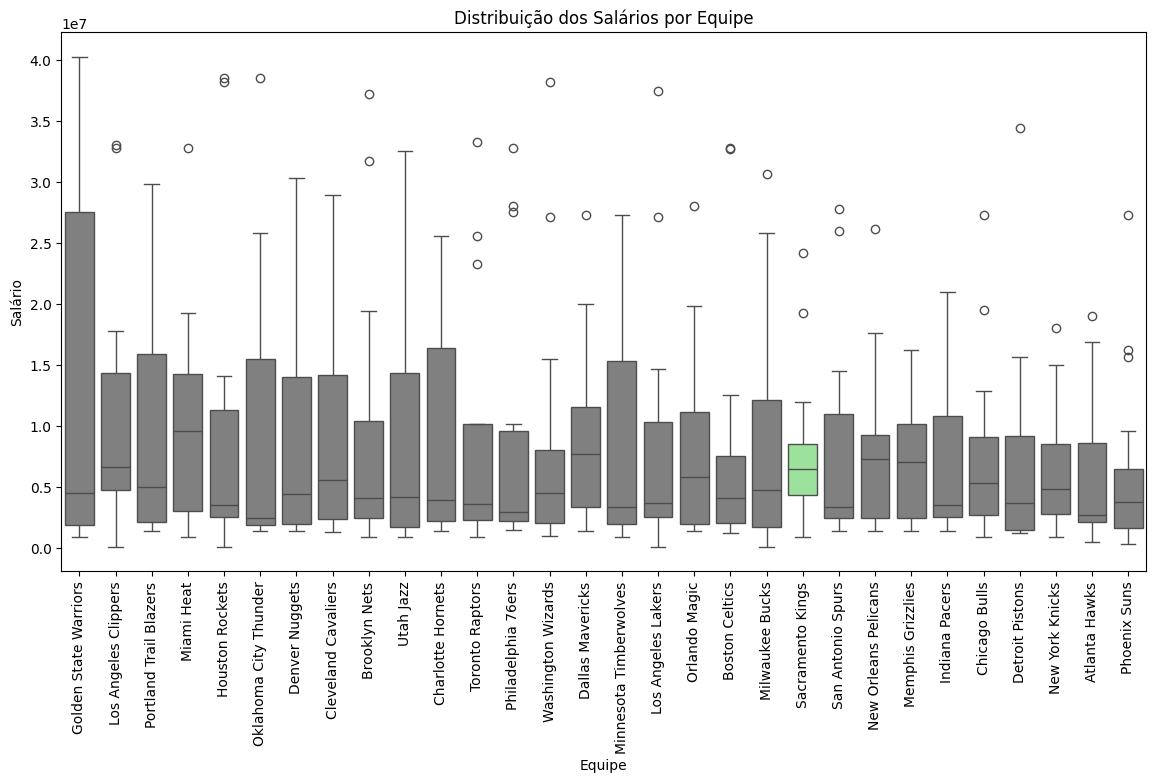

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

mean_salaries = df1.groupby('team')['salary'].mean().reset_index()
mean_salaries = mean_salaries.sort_values(by='salary', ascending=False)
ordered_teams = mean_salaries['team'].tolist()

team_colors = ['lightgreen' if team == 'Sacramento Kings' else 'gray' for team in ordered_teams]

plt.figure(figsize=(14, 7))
sns.boxplot(x='team', y='salary', data=df1, order=ordered_teams, palette=team_colors)

plt.xticks(rotation=90)
plt.title('Distribuição dos Salários por Equipe')
plt.xlabel('Equipe')
plt.ylabel('Salário')
plt.show()

**O gráfico mostra uma disparidade salarial notável entre as equipes da NBA. Os Golden State Warriors e Los Angeles Clippers se destacam por possuírem uma estrutura salarial com grandes diferenças, o que indica a presença de craques com salários bem acima da média de seu time. Em contraste, equipas como o Atlanta Hawks e o Phoenix Suns apresentam uma distribuição salarial mais uniforme, sugerindo uma estratégia de investimento mais equilibrada sem depender tanto de jogadores com salários extremamente elevados.**

• Média de gastos com salário, do seu time e dos concorrentes

In [ ]:
salary_mean = df1.groupby('team')['salary'].mean()
salary_sorted = salary_mean.sort_values(ascending=False)
print('Média de Salários por Time:')
salary_sorted

Média de Salários por Time:


,salary
team,
Golden State Warriors,14347339.00
Los Angeles Clippers,10774057.29
Portland Trail Blazers,10671061.25
Miami Heat,10438351.00
Houston Rockets,10317469.08
Oklahoma City Thunder,10021747.92
Denver Nuggets,9937247.15
Cleveland Cavaliers,9901506.92
Brooklyn Nets,9774913.64


• Salário Máximo, Mínimo e Mediano

In [ ]:
salary_stats = df1['salary'].describe()
print('\nEstatísticas de Salário:')
salary_stats


Estatísticas de Salário:


,salary
count,429.00
mean,8530080.27
std,9218059.12
min,50000.00
25%,2000000.00
50%,4380120.00
75%,12200000.00
max,40231758.00


**Salários**

**Máximo: 40.231.758**

**Mínimo: 50.000**

**Mediano: 8.530.080**

**b) Relação Salário x Outros Atributos**

• Gráfico de Dispersão Salário x Idade

In [ ]:
from datetime import datetime

def calculate_age(birth_date):
    today = datetime.today()
    age = today.year - birth_date.year
    if (today.month, today.day) < (birth_date.month, birth_date.day):
        age -= 1
    return age


df1['age'] = df1['b_day'].apply(calculate_age)

df1

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,age
0,LeBron James,97,23,Los Angeles Lakers,Forward,1984-12-30,2.06,113.40,37436858.00,USA,2003,1,1,Not informed,39
1,Kawhi Leonard,97,2,Los Angeles Clippers,Forward,1991-06-29,2.01,102.10,32742000.00,USA,2011,1,15,San Diego State,33
2,Giannis Antetokounmpo,96,34,Milwaukee Bucks,Forward-Guard,1994-12-06,2.11,109.80,25842697.00,Greece,2013,1,15,Not informed,29
3,Kevin Durant,96,7,Brooklyn Nets,Forward,1988-09-29,2.08,104.30,37199000.00,USA,2007,1,2,Texas,36
4,James Harden,96,13,Houston Rockets,Guard,1989-08-26,1.96,99.80,38199000.00,USA,2009,1,3,Arizona State,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,Brandon Goodwin,68,0,Atlanta Hawks,Guard,1995-10-02,1.83,81.60,522738.00,USA,2018,Undrafted,Undrafted,Florida Gulf Coast,29
425,Michael Frazier,68,21,Houston Rockets,Guard,1994-03-08,1.91,90.70,79568.00,USA,2015,2,60,Florida,30
426,Kostas Antetokounmpo,68,37,Los Angeles Lakers,Forward,1997-11-20,2.08,90.70,79568.00,Greece,2018,Undrafted,Undrafted,Dayton,26
427,Jalen Lecque,68,0,Phoenix Suns,Guard,2000-06-13,1.91,86.20,898310.00,USA,2019,Undrafted,Undrafted,Not informed,24


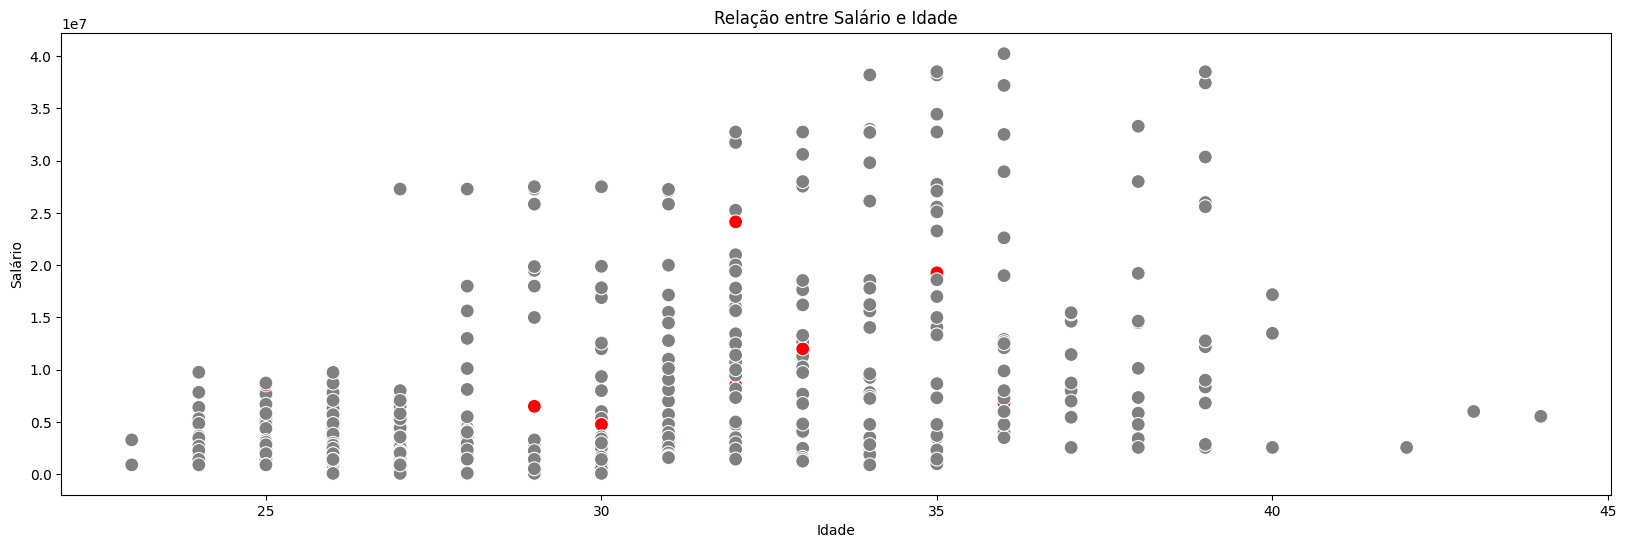

In [ ]:
palette = {'Sacramento Kings': 'gray', 'Otro Equipo': 'red'}

plt.figure(figsize=(20, 6))
sns.scatterplot(x='age', y='salary', data=df1, hue='color', palette=['gray', 'red'], s=100, legend=False)
plt.title('Relação entre Salário e Idade')
plt.xlabel('Idade')
plt.ylabel('Salário')
plt.show()

**Não parece haver uma relação linear clara entre salário e idade. Os pontos estão dispersos por vários níveis salariais para diferentes idades.**

*   Gráfico de Dispersão Salário x Altura/Peso

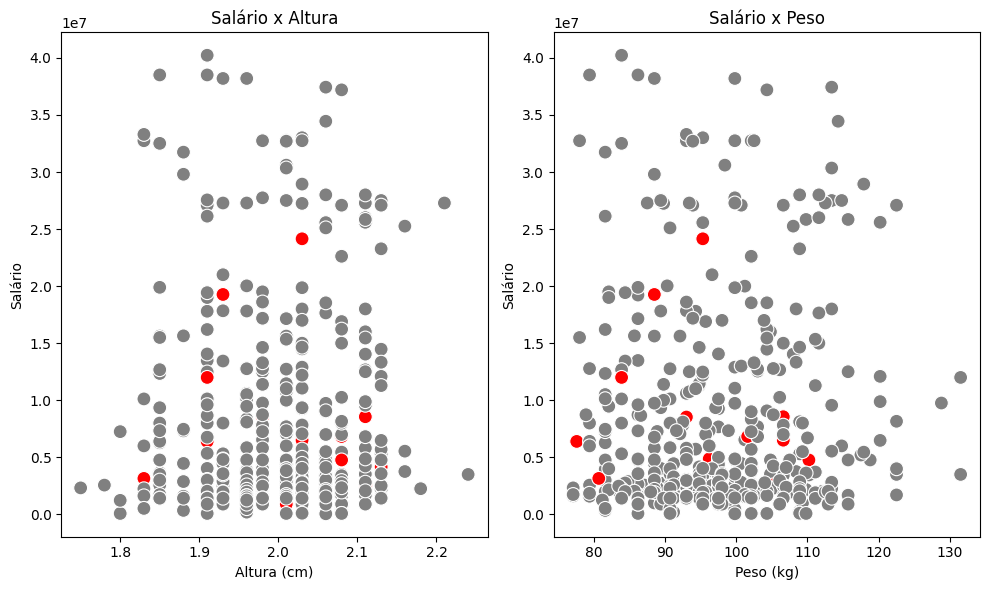

In [ ]:
palette = {'Sacramento Kings': 'gray', 'Otro Equipo': 'red'}

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='height', y='salary', data=df1, hue='color', palette=['gray', 'red'], s=100, legend=False)
plt.title('Salário x Altura')
plt.xlabel('Altura (cm)')
plt.ylabel('Salário')

plt.subplot(1, 2, 2)
sns.scatterplot(x='weight', y='salary', data=df1, hue='color', palette=['gray', 'red'], s=100, legend=False)
plt.title('Salário x Peso')
plt.xlabel('Peso (kg)')
plt.ylabel('Salário')

plt.tight_layout()
plt.show()


**Não parece haver uma relação linear clara entre salário e altura/peso. Os pontos estão dispersos por vários níveis salariais para diferentes altura/peso.**

**Observando os gráficos de dispersão, os salários estão distribuídos de maneira justa entre diferentes alturas e pesos, sem nenhum padrão óbvio sugerindo que jogadores mais altos ou mais pesados ​​ganhem mais. Os pontos estão espalhados por ambos os gráficos, indicando que factores como a altura ou o peso por si só não parecem ser determinantes claros dos salários dos jogadores.**

*   Gráfico de Barras Salário Médio por Posição

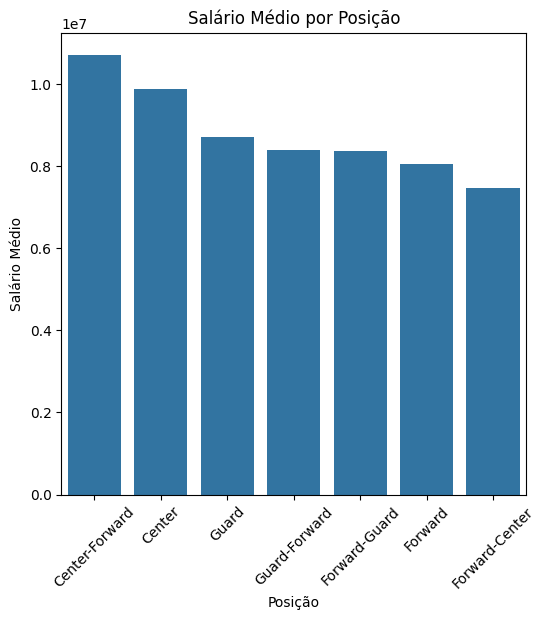

In [ ]:
mean_salary_by_position = df1.groupby('position')['salary'].mean().reset_index()

mean_salary_by_position = mean_salary_by_position.sort_values(by='salary', ascending=False)

plt.figure(figsize=(6, 6))
sns.barplot(x='position', y='salary', data=mean_salary_by_position, estimator='mean', order=mean_salary_by_position['position'])
plt.title('Salário Médio por Posição')
plt.xlabel('Posição')
plt.ylabel('Salário Médio')
plt.xticks(rotation=45)
plt.show()


**A análise dos salários dos jogadores de basquete mostra que aqueles na posição de C-F (Center-Forward) têm o salário médio mais alto. As outras posições apresentam salários médios relativamente próximos entre si, indicando uma valorização mais equitativa. No entanto, os jogadores na posição de F-G (Forwards-Guard) recebem os salários medios mais baixos.**

• Gráfico de Barras Salário Médio por Time

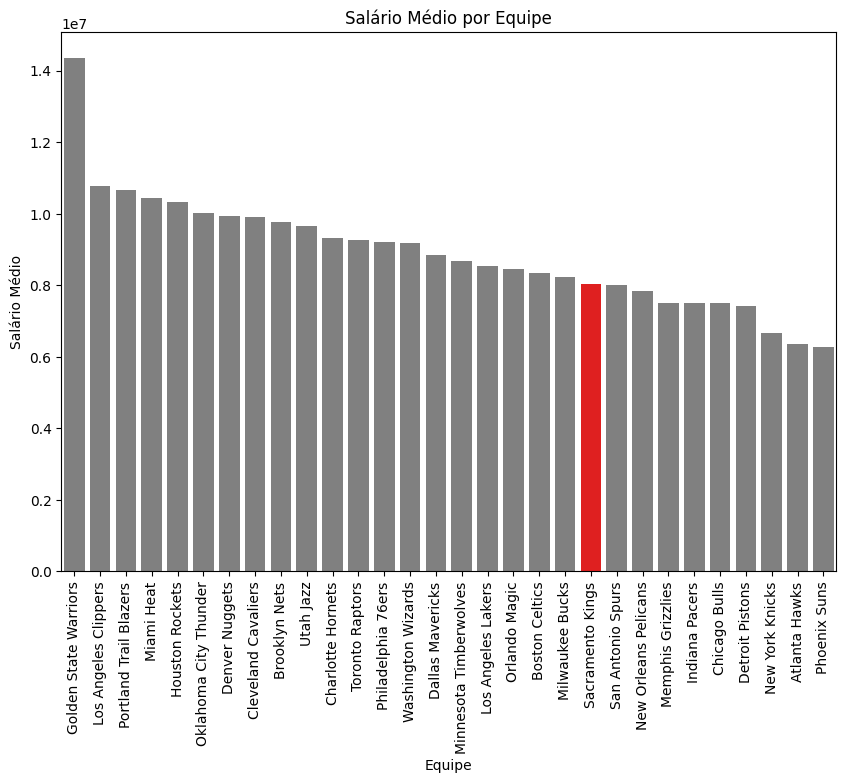

In [ ]:
salary_mean = df1.groupby('team')['salary'].mean().reset_index()
salary_mean = salary_mean.sort_values(by='salary', ascending=False)

df_sacramento = salary_mean[salary_mean['team'] == 'Sacramento Kings']
df_other_teams = salary_mean[salary_mean['team'] != 'Sacramento Kings']

plt.figure(figsize=(10, 7))

sns.barplot(x='team', y='salary', data=df_other_teams, color='gray', estimator='mean', order=salary_mean['team'])
sns.barplot(x='team', y='salary', data=df_sacramento, color='red', estimator='mean')
plt.title('Salário Médio por Equipe')
plt.xlabel('Equipe')
plt.ylabel('Salário Médio')
plt.xticks(rotation=90)
plt.show()

**c) Performance dos Jogadores**

• Gráfico de Barras Média de Rating por Posição

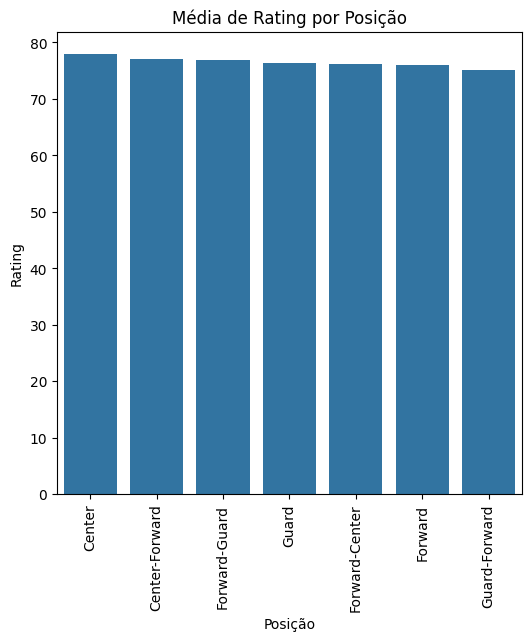

In [ ]:
mean_rating_by_position = df1.groupby('position')['rating'].mean().reset_index()

mean_rating_by_position = mean_rating_by_position.sort_values(by='rating', ascending=False)

plt.figure(figsize=(6, 6))
sns.barplot(x='position', y='rating', data=mean_rating_by_position, estimator='mean', order=mean_rating_by_position['position'])
plt.title('Média de Rating por Posição')
plt.xlabel('Posição')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()

• Gráfico de Dispersão Rating x Salário

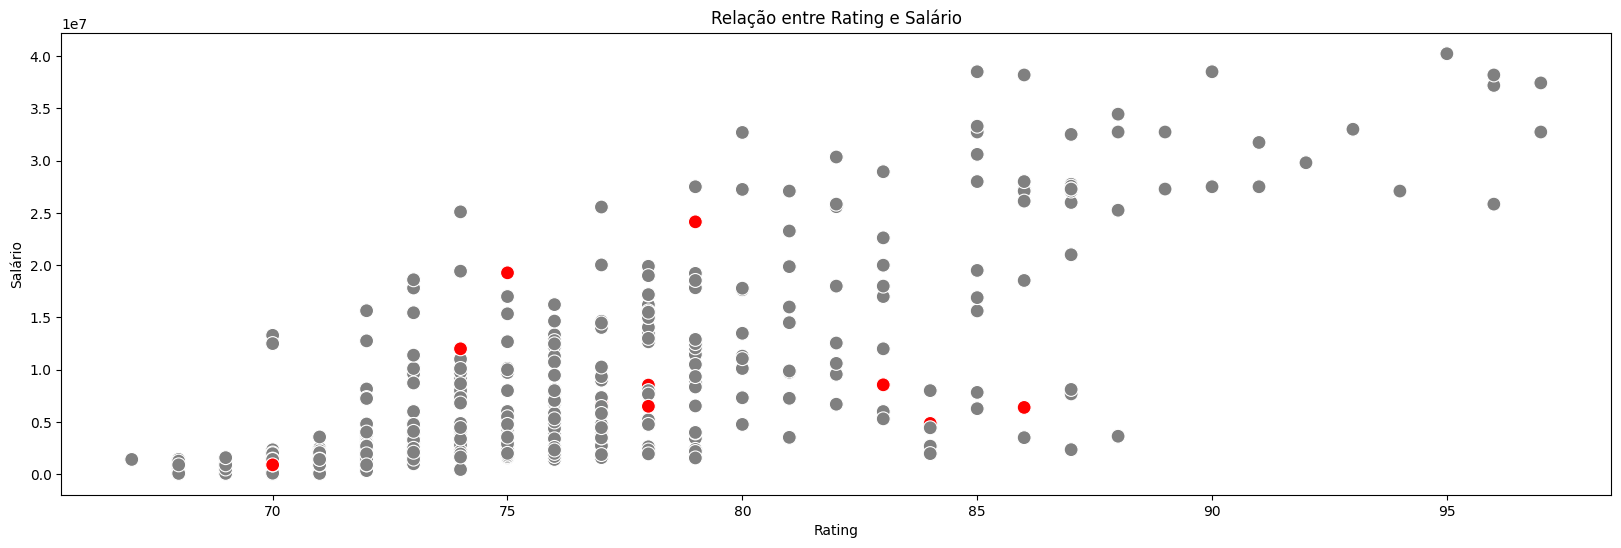

In [ ]:
palette = {'Sacramento Kings': 'gray', 'Otro Equipo': 'red'}

plt.figure(figsize=(20,6))
sns.scatterplot(x='rating', y='salary', data=df1, hue='color', palette=['gray', 'red'], s=100, legend=False)
plt.title('Relação entre Rating e Salário')
plt.xlabel('Rating')
plt.ylabel('Salário')
plt.show()

**Neste gráfico vemos que quanto maior é o Rating, maiores serão os salários.**

**d) Comparação entre Times**

• Gráfico de Pizza Distribuição de Posições por Time

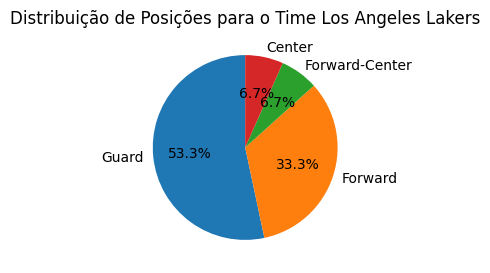

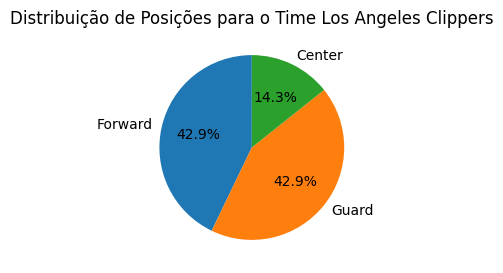

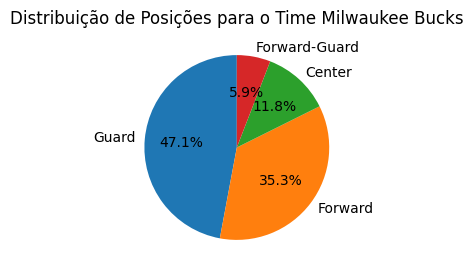

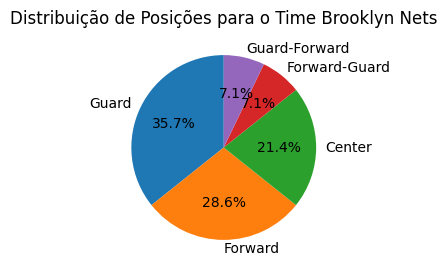

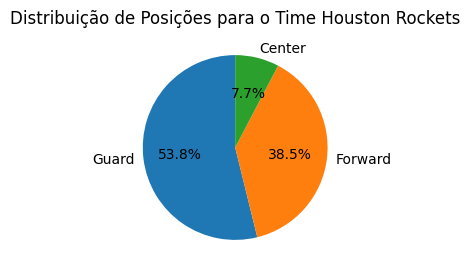

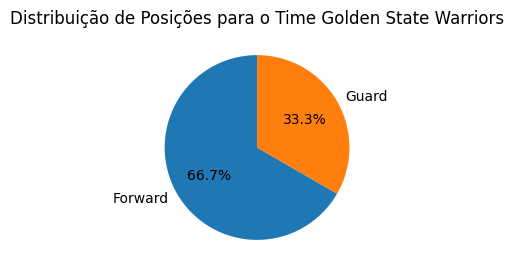

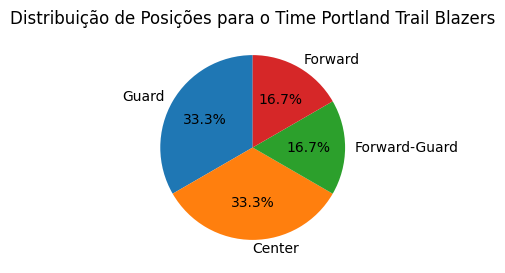

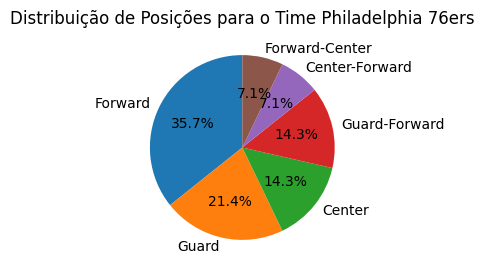

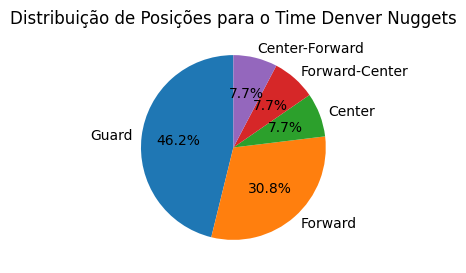

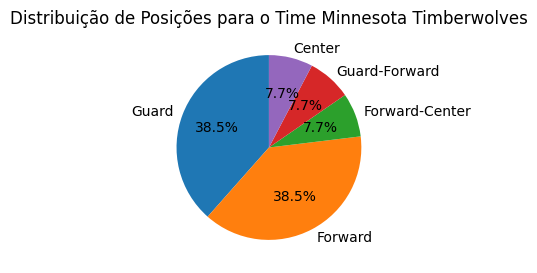

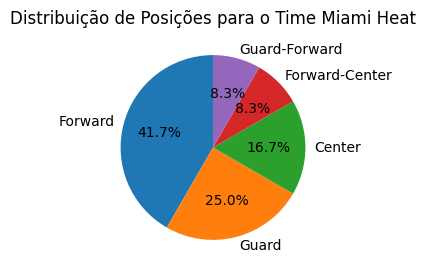

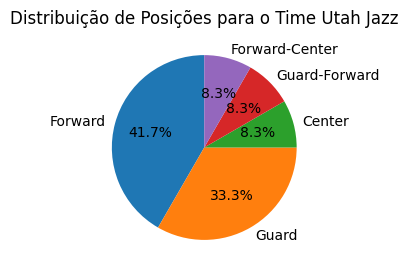

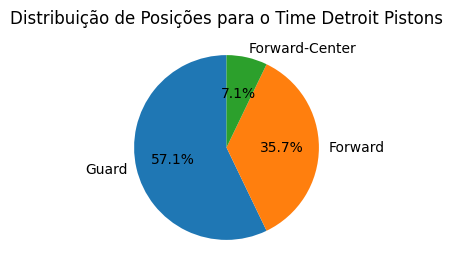

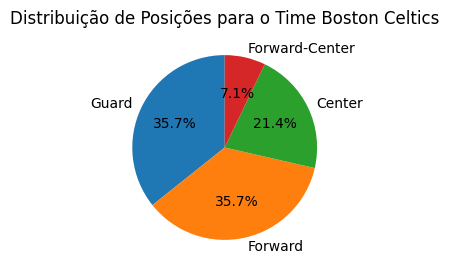

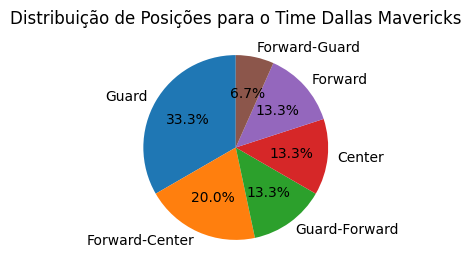

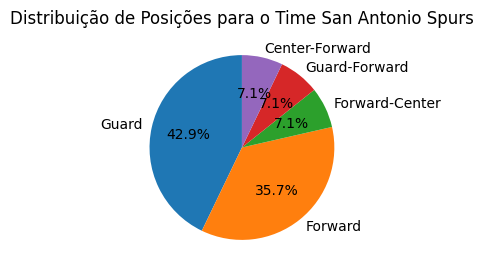

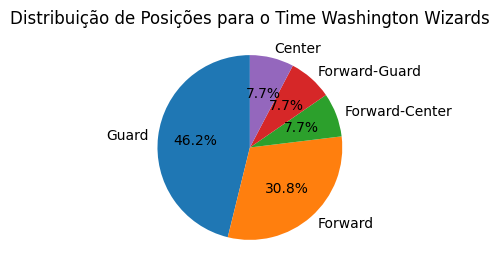

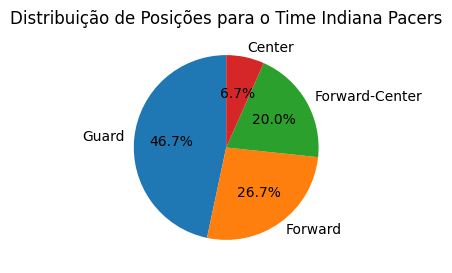

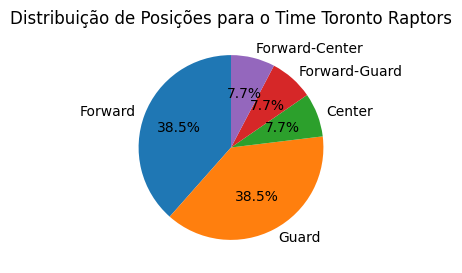

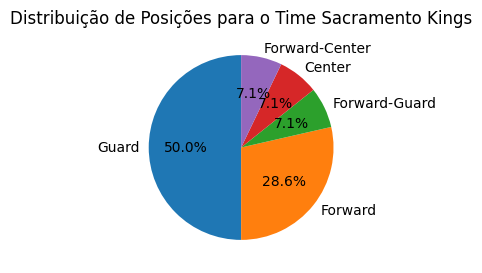

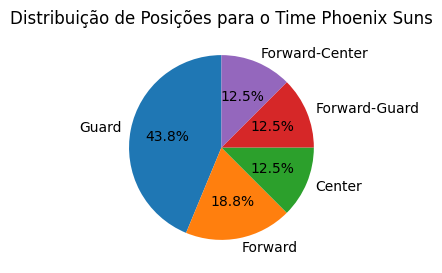

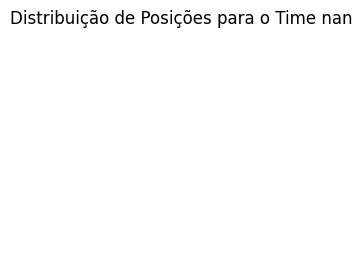

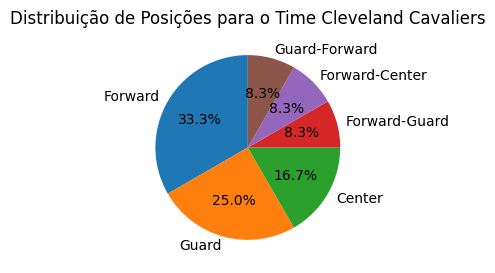

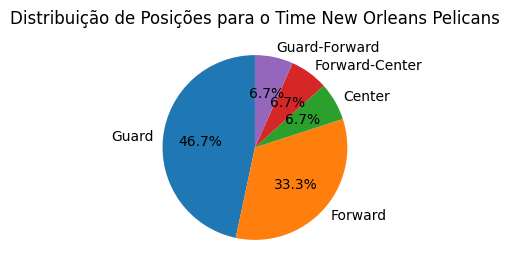

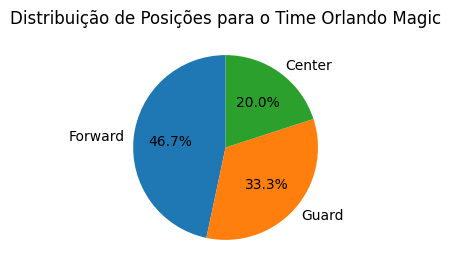

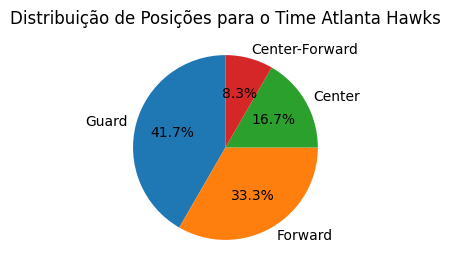

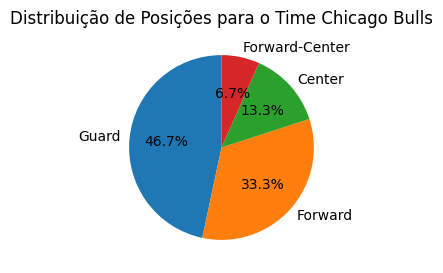

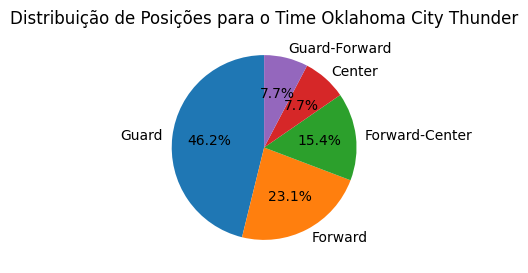

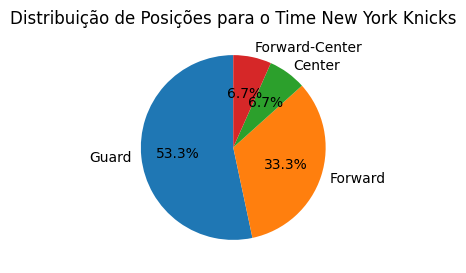

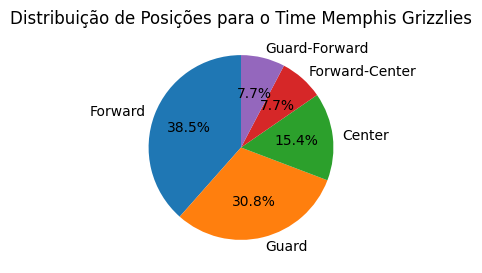

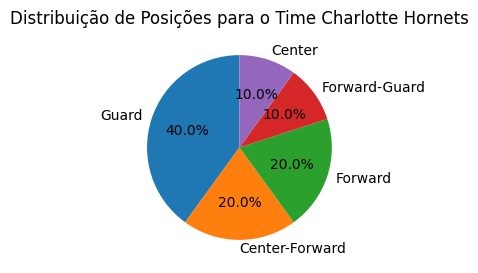

In [ ]:
teams = df1['team'].unique()

for team in teams:
    team_df = df1[df1['team'] == team]
    position_counts = team_df['position'].value_counts()

    plt.figure(figsize=(3, 3))
    plt.pie(position_counts, labels=position_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribuição de Posições para o Time {team}')
    plt.show()

• Gráfico de Barras Total de Salários por Time

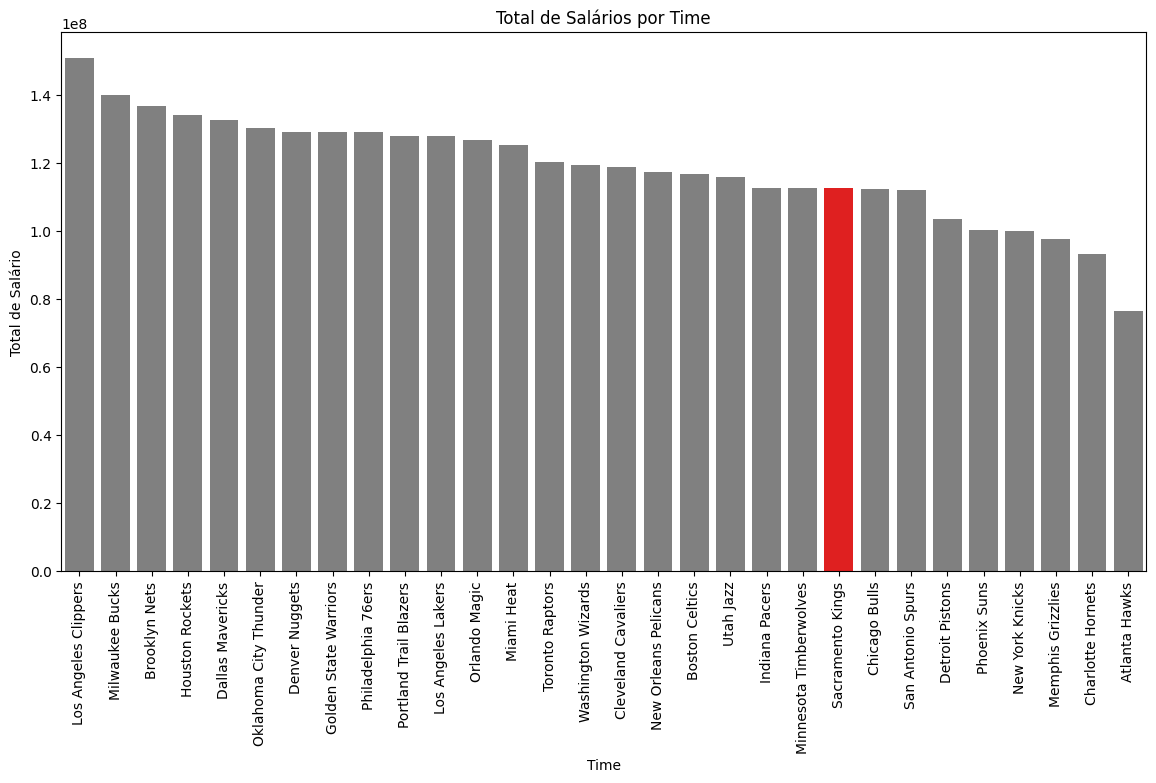

In [ ]:
total_salary = df1.groupby('team')['salary'].sum().reset_index()
total_sorted = total_salary.sort_values(by='salary', ascending=False)

df_sacramento = total_sorted[total_sorted['team'] == 'Sacramento Kings']
df_other_teams = total_sorted[total_sorted['team'] != 'Sacramento Kings']

plt.figure(figsize=(14, 7))
sns.barplot(x='team', y='salary', data=df_other_teams, color='gray', estimator='sum', order=total_sorted['team'])
sns.barplot(x='team', y='salary', data=df_sacramento, color='red', estimator='sum', order=total_sorted['team'])
plt.title('Total de Salários por Time')
plt.xlabel('Time')
plt.ylabel('Total de Salário')
plt.xticks(rotation=90)
plt.show()

• Gráfico de Colunas Rating por Time

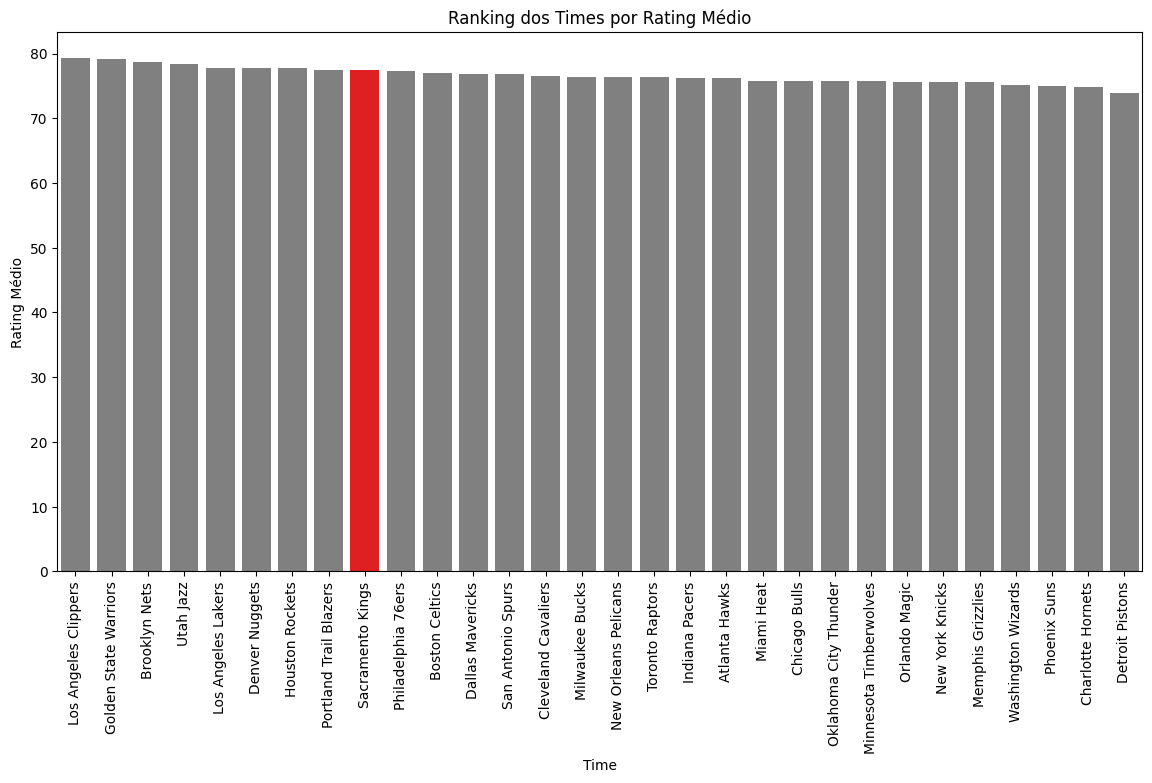

In [ ]:
rating_time = df1.groupby('team')['rating'].mean().reset_index().sort_values(by='rating', ascending=False)

df_sacramento = rating_time[rating_time['team'] == 'Sacramento Kings']
df_other_teams = rating_time[rating_time['team'] != 'Sacramento Kings']
plt.figure(figsize=(14, 7))
sns.barplot(x='team', y='rating', data=df_other_teams, color='gray', order=rating_time['team'])
sns.barplot(x='team', y='rating', data=df_sacramento, color='red', order=rating_time['team'])
plt.title('Ranking dos Times por Rating Médio')
plt.xlabel('Time')
plt.ylabel('Rating Médio')
plt.xticks(rotation=90)

plt.show()

## **Sacramento Kings**

In [ ]:
kings_data = df1[df1['team'] == 'Sacramento Kings']
kings_data

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college
31,De'Aaron Fox,86,5,Sacramento Kings,Guard,1997-12-20,1.91,77.60,6392760.00,USA,2017,1,5,Kentucky
50,Buddy Hield,84,24,Sacramento Kings,Guard,1993-12-17,1.93,96.20,4861207.00,The Bahamas,2016,1,6,Oklahoma
54,Marvin Bagley,83,35,Sacramento Kings,Forward,1999-03-14,2.11,106.60,8556120.00,USA,2018,1,2,Duke
94,Harrison Barnes,79,40,Sacramento Kings,Forward,1992-05-30,2.03,95.30,24147727.00,USA,2012,1,7,North Carolina
115,Bogdan Bogdanovic,78,8,Sacramento Kings,Guard,1992-08-18,1.98,93.00,8529386.00,Serbia,2014,1,27,Not informed
130,Jabari Parker,78,0,Sacramento Kings,Forward,1995-03-15,2.03,106.60,6500000.00,USA,2014,1,2,Duke
143,Nemanja Bjelica,77,88,Sacramento Kings,Forward-Guard,1988-05-09,2.08,101.60,6825000.00,Serbia,2010,2,35,Not informed
150,Alex Len,77,0,Sacramento Kings,Center,1993-06-16,2.13,102.10,4160000.00,Ukraine,2013,1,5,Maryland
205,Kent Bazemore,75,26,Sacramento Kings,Guard,1989-07-01,1.93,88.50,19269663.00,USA,2012,Undrafted,Undrafted,Old Dominion
219,Richaun Holmes,75,22,Sacramento Kings,Forward,1993-10-15,2.08,110.20,4767000.00,USA,2015,2,37,Bowling Green


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


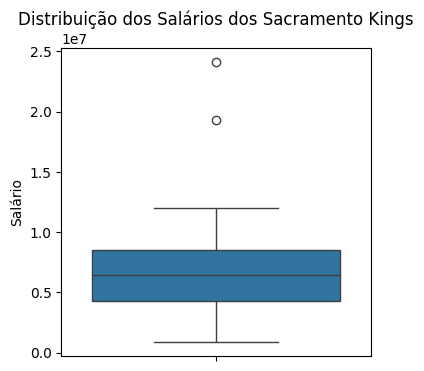

In [ ]:
# Boxplot de Salarios

plt.figure(figsize=(4, 4))
sns.boxplot(y='salary', data=kings_data)
plt.title('Distribuição dos Salários dos Sacramento Kings')
plt.ylabel('Salário')
plt.show()

**Média de salário:** 8.106.799

**Salário mínimo:** 898.310

**Salário máximo:** 24.147.730

**25%:** 	3.907.500

**50%:** 	5.626.984

**75%:** 	9.417.090

**2 outliers:** 24.147.727 e 19.269.663

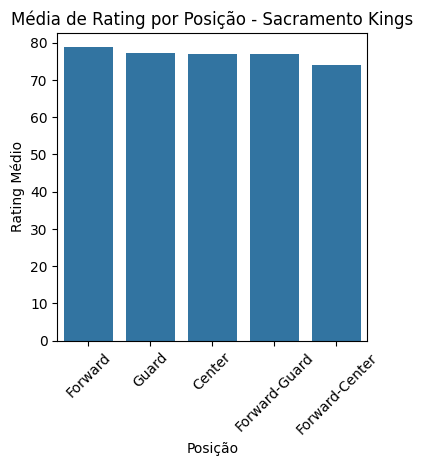

In [ ]:
# Gráfico de Rating por Posição
rating_sort = kings_data.groupby('position')['rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(4, 4))
sns.barplot(x=rating_sort.index, y=rating_sort.values)
plt.title('Média de Rating por Posição - Sacramento Kings')
plt.xlabel('Posição')
plt.ylabel('Rating Médio')
plt.xticks(rotation=45)
plt.show()

**Dentro da equipe do Sacramento Kings, os jogadores que ocupam a posição F (Atacante) apresentam, em média, um desempenho (ou rating) um pouco superior em comparação com outras posições da equipe. Por outro lado, os jogadores classificados como F-C (Avançado-Centro) apresentam a classificação média mais baixa.**

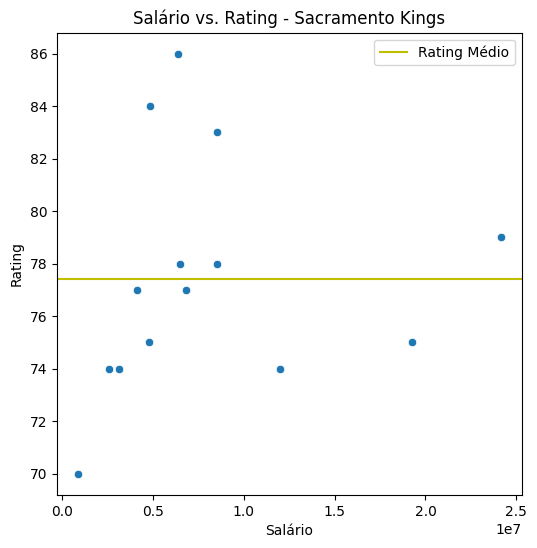

In [ ]:
# Gráfico de Salário vs. Rating

plt.figure(figsize=(6, 6))
sns.scatterplot(x='salary', y='rating', data=kings_data)
plt.title('Salário vs. Rating - Sacramento Kings')
plt.xlabel('Salário')
plt.ylabel('Rating')
plt.axhline(y=kings_data['rating'].mean(), color='y', label='Rating Médio')
plt.legend()
plt.show()

Rating

mean	77

std	4.795042

min	70

25%	74

50%	76

75%	80

max	86

**Não há relação entre rating e salário**

<ipython-input-96-be74c2f70f4e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kings_data['age'] = (pd.to_datetime('today') - kings_data['b_day']).dt.days // 365


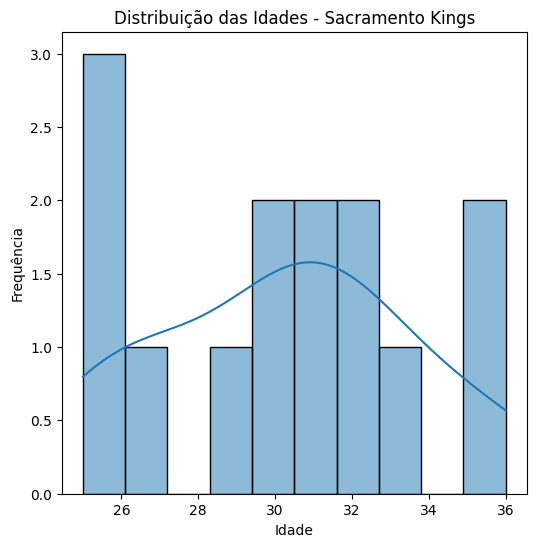

In [ ]:
# Histograma de idades

kings_data['age'] = (pd.to_datetime('today') - kings_data['b_day']).dt.days // 365

plt.figure(figsize=(6, 6))
sns.histplot(kings_data['age'], bins=10, kde=True)
plt.title('Distribuição das Idades - Sacramento Kings')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

**No time Sacramento King os jogadores têm entre 25 e 35 anos.**


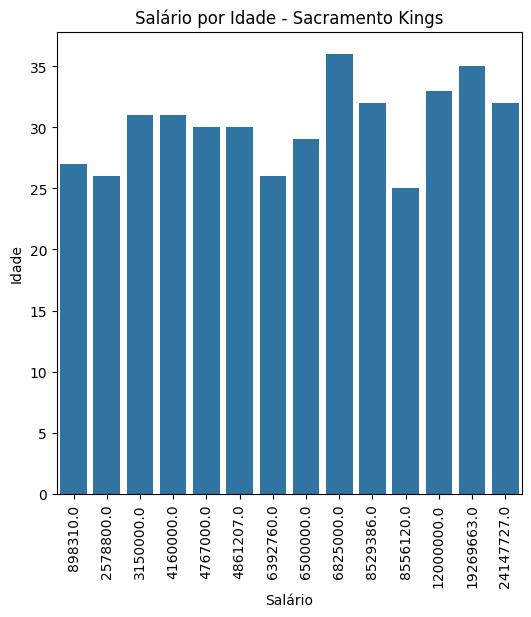

In [ ]:
# Gráfico de Comparação de salários e Idades

plt.figure(figsize=(6, 6))
sns.barplot(x='salary', y='age', data=kings_data)

plt.title('Salário por Idade - Sacramento Kings')
plt.xlabel('Salário')
plt.ylabel('Idade')
plt.xticks(rotation=90)

plt.show()

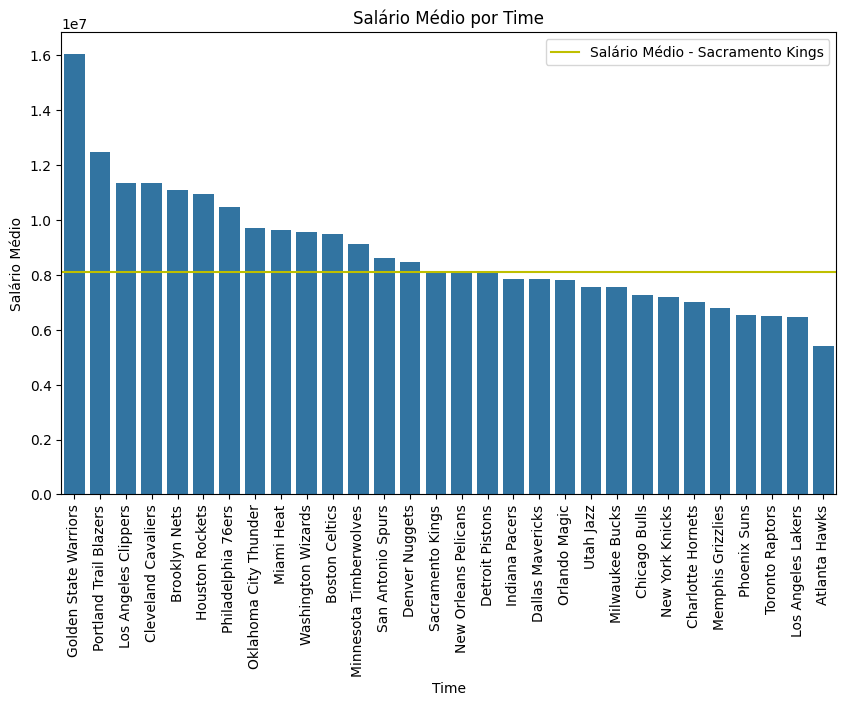

In [ ]:
# Gráfico de Comparação de salários
mean_salaries = df1.groupby('team')['salary'].mean().reset_index()
mean_salaries = mean_salaries.sort_values(by='salary', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='team', y='salary', data=mean_salaries)
plt.axhline(y=kings_data['salary'].mean(), color='y', label='Salário Médio - Sacramento Kings')
plt.title('Salário Médio por Time')
plt.xlabel('Time')
plt.ylabel('Salário Médio')
plt.xticks(rotation=90)
plt.legend()
plt.show()


#### **Perguntas de negócio, KPIs, Insights e Recomendações:**



## **1. Análise Salarial vs. Avaliação**

#### **KPI: Correlação entre Salário e Classificação:**

A observação de que existem jogadores com ratings baixos que recebem salários elevados indica uma possível ineficiência no investimento da equipe. Isto pode sugerir que a equipe fez contratos que não estão alinhados com o desempenho real dos jogadores.

A situação oposta, em que jogadores com ratings elevados recebem salários mais baixos, também sugere que a equipa poderia beneficiar da reavaliação da remuneração e possivelmente da renegociação de contratos ou da procura de acordos mais justos que reconheçam adequadamente o desempenho.

### **Insights e Recomendações**

**Renovação de Contratos:** Poderia ser considerada a renegociação de contratos de jogadores com ratings baixos e salários elevados, procurando libertar espaço salarial para potencialmente trazer talentos que ofereçam melhor desempenho.

**Avaliação de talentos:** É importante realizar uma avaliação mais profunda dos jogadores que possuem ratings altos e salários baixos. Isto pode incluir a análise do seu desempenho no jogo, do seu potencial de crescimento e da sua contribuição para a equipe, para determinar se devem ser um foco principal no futuro da equipe.

## **2. Análise de Idade**

#### **KPI: Distribuição etária:**

A distribuição etária na equipe mostra uma maioria de jogadores na faixa de 26 a 32 anos, o que indica que a equipe possui um núcleo de jogadores relativamente jovem, mas experiente. A presença de jogadores de 36 e 35 anos sugere que o time também conta com alguns veteranos, que podem proporcionar liderança e experiência em momentos críticos.

### **Insights e Recomendações**

A idade média da equipe sugere potencial de crescimento à medida que os jovens jogadores amadurecem e ganham mais experiência na liga.

Poderia ser considerada uma abordagem de longo prazo que investe no desenvolvimento de jovens jogadores, maximizando o seu potencial, ao mesmo tempo que mantém um equilíbrio com os veteranos para proporcionar estabilidade à equipe.

## **3. Análise de Rating do jogador por posição:**

#### **KPI: Rating por posição**

### **Insights e Recomendações**
Se os Fowards tiverem o rating mais elevado, mas salários mais baixos, poderá ser uma oportunidade para ajustar a estratégia de recrutamento para fortalecer essa posição.